# Section 3: Vector Models and Text Preprocessing

### Basic definitions:

>**Token:**
- A token is a sub-unit of substance, it can be a 'word', can be a 'punctuation', also can be a sub-words. A token is often used interchangibly with 'word'.

>**Letters and Characters:**
- Letters: a, A, b, B.
- Characters: '_', '\n'.
- [All letters are characters, but not all characters are letters].

>**Vocabulary:**
- Collection of all the words.

>**Corpus:**
- Nothing but the dataset our ML model will be trained on.

>**N-gram:**
- N-consecutive items.
- unigram - 'I', bigram - 'good morning', trigram - 'See you soon'.
- Usecase - word2vec (bigrams), markov models (bigram probabilities).

>**Vector:**
- An array of scalars.
- Usecase - in spam detection, vectors are used as working with vectors are easier than working with raw text.

>**Bag of Words:**
- An unordered collection of words.

>**Stopwords:**
- Words that don't provide any context.
- "and", "the", "but".

>**Stemming and lemmatization:**
- Converting words to root words.
- Stemming - crude, may or may not produce meaningful word.
- Lemmatization - sophisticated, returns a meaningful root word (aka lemma).
- Root word of a word is dependent upon its POS.

>**Vector Similarity:**
- Calculating the similarity b/w two vectors and giving a similarity score as an output.
- Application - article spinning, word replacement
- Measures of similarity - Euclidean distance, cosine similarity, cosine similarity is more commonly used.
- Euclidean Distance- The Euclidean distance `d` between two points `A(x₁, y₁)` and `B(x₂, y₂)` is given by the formula:

    <p style="text-align: center;">d = sqrt((x₂ - x₁)² + (y₂ - y₁)²)</p>

- Cosine similarity - The cosine similarity between two vectors A and B is given by the formula:

    - Cosine Similarity = (A · B) / (||A|| ||B||)
    Where:
    - A · B is the dot product of A and B.
    - ||A|| is the magnitude of vector A.
    - ||B|| is the magnitude of vector B.
    In expanded form, this can be written as:
    <p style="text-align: center;">Cosine Similarity = Σ (Aᵢ * Bᵢ) / (√(Σ Aᵢ²) * √(Σ Bᵢ²))</p>
    Where Σ denotes the summation over the vector elements.

- When we are ranking the similarities, after sorting them by similraity scores, the euclidean distance annd cosine similarity is somehow equivalent.
- If we normalize vectors, the L2-norm becomes 1: Converting all the vectors into unit length, thus just comparing them based on angles b/w them, which makes the comparison simple.
- L2-norm - Nothing but euclidean distance of a vector from origin.
    - The L2-norm (Euclidean norm) of a vector A with n components is given by the formula:

    <p style="text-align: center;">||A||₂ = √(Σ Aᵢ²)</p>

    - Where:
        - ||A||₂ represents the L2-norm of vector A.
        - Aᵢ denotes the i-th component of vector A.

    - This formula calculates the square root of the sum of squares of each component of the vector, providing a measure of the vector's magnitude in Euclidean space.

>**Word embedding:**
- Unlike representing words as isolated entities with frequencies, like in count vectorizing, word embedding captures the semantic relationships b/w words. 
- Words with similar meanings or contexts are closer together in the embedding space. 
- Man:King::Woman:Queen, Miami:Florida::Dallas:Texas

### Tokenization:
>**Definition:**
- "I like cats" -> str.split() -> ["I", "like", "cats"]
- Punctuation characters can be tokenized, if it enhances the result
- Types of tokenization - word-based, character-based, sub-word based


#### Using Count Vectorizer

>**Definition:**
- Counting the scalers inside a vector.

In [1]:
# %pip install scikit-learn
# %pip install nltk
# %pip install --upgrade pip

In [2]:
# Import CountVectorizer function from sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# Read the text file as the possible corpus
with open('../textfile.txt', 'r') as f:
    corpus = [line.strip() for line in f]
corpus

['This is the first document.',
 'This document is the second document.',
 'And this is the third one.',
 'Is this the first document?']

In [4]:
# Create a CountVectorizer object, perform tokenization
# Considering words as tokens, Converting the corpus to lowercase, avoiding any accent
vectorizer_cv = CountVectorizer(analyzer='word', lowercase=True, strip_accents='ascii') 
# vectorizer_cv = CountVectorizer(analyzer='char', lowercase=True, strip_accents='ascii') # For character-level tokenization
X = vectorizer_cv.fit_transform(corpus)

In [5]:
# Get the vocabulary
vectorizer_cv.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [6]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [7]:
# Removing stopwords
# Importing stopwords function for nltk
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\debnathk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\debnathk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
word_tokens = word_tokenize(corpus[0])
word_tokens

['This', 'is', 'the', 'first', 'document', '.']

In [10]:
# Filter stopword from corpus
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
filtered_sentence

['first', 'document', '.']

In [11]:
## Stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
for word in word_tokens:
    print(f'{word}: {stemmer.stem(word)}')

This: thi
is: is
the: the
first: first
document: document
.: .


In [12]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
for word in word_tokens:
    print(f'{word}: {lemmatizer.lemmatize(word)}')

This: This
is: is
the: the
first: first
document: document
.: .


In [13]:
# Extra: POS-tagging

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    if treebank_tag.startswith('V'):
        return wordnet.VERB
    if treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [14]:
sentence = "Donal Trump has a devoted following."
sentence_tok = word_tokenize(sentence)
sentence_tok

['Donal', 'Trump', 'has', 'a', 'devoted', 'following', '.']

In [15]:
nltk.download('averaged_perceptron_tagger')

words_and_tags = nltk.pos_tag(sentence_tok)
words_and_tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\debnathk\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Donal', 'NNP'),
 ('Trump', 'NNP'),
 ('has', 'VBZ'),
 ('a', 'DT'),
 ('devoted', 'VBN'),
 ('following', 'NN'),
 ('.', '.')]

In [16]:
for word, tag in words_and_tags:
    lemma = lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag))
    print(lemma, end=" ")

Donal Trump have a devote following . 

#### Using TF-IDF:

>**Definition:**
- To improve the count-vectorizer.
- Popular for documnet retrieval and text mining.
- Intuition - If a word appears many times in several documents, it basically doesn't hold much significance in analyzing those documents.
- The TF-IDF (Term Frequency-Inverse Document Frequency) score of a term `t` in a document `d` within a corpus is calculated as follows:

    <p style="text-align: center;">TF-IDF(t, d, D) = TF(t, d) × IDF(t, D)</p>

    - Where:
        - TF(t, d) is the term frequency of term `t` in document `d`, representing the frequency of term `t` in document `d`.
        - IDF(t, D) is the inverse document frequency of term `t` in corpus `D`, representing the logarithmically scaled inverse fraction of the documents that contain term `t` across the entire corpus `D`.

    - TF-IDF score is used to evaluate the importance of a term within a document relative to its frequency in the entire corpus, providing a measure of the significance of the term in the context of the document and corpus.
- The normalized TF-IDF score of a term t in a document d within a corpus is calculated as follows:

    <p style="text-align: center;">TF-IDF_norm(t, d, D) = TF-IDF(t, d, D) / √(∑(TF-IDF(t', d, D)²))</p>

    - Where:
        - TF-IDF(t, d, D) is the TF-IDF score of term t in document d within corpus D, as calculated by the TF-IDF formula.
        - ∑ denotes the summation over all terms t' in document d.
        - TF-IDF_norm(t, d, D) is the normalized TF-IDF score of term t in document d within corpus D.

    - The normalized TF-IDF score scales down the TF-IDF score of each term in a document by the Euclidean norm of the TF-IDF vector for that document, ensuring that the scores are in the range [0, 1].




In [17]:
# Create an TfidfVectorizer() object, create the vector
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(corpus)

In [18]:
# Get the features
vectorizer_tfidf.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [19]:
X_tfidf.toarray()

array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

### Case Study: Application of Machine Learning

Here, we will be comparing different tokenizing, stemming and lemmatizing approaches by training a MultinomialNB model

In [28]:
# Load libraries

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [29]:
# Download required nltk packages

nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\debnathk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\debnathk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\debnathk\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\debnathk\AppData\Roaming\nltk_data...


True

In [20]:
# Download Data

# import requests

# url = 'https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv'
# response = requests.get(url)

# # Make sure the request was successful
# assert response.status_code == 200

# # Write the content to a file
# with open('bbc_text_cls.csv', 'wb') as f:
#     f.write(response.content)

In [30]:
# Read the data

data = pd.read_csv('../data/bbc_text_cls.csv')
data.head()

,text,labels
0,Ad sales boost Time Warner profit\r\n\r\nQuart...,business
1,Dollar gains on Greenspan speech\r\n\r\nThe do...,business
2,Yukos unit buyer faces loan claim\r\n\r\nThe o...,business
3,High fuel prices hit BA's profits\r\n\r\nBriti...,business
4,Pernod takeover talk lifts Domecq\r\n\r\nShare...,business


In [31]:
# Split data into train test

inputs = data['text']
labels = data['labels']

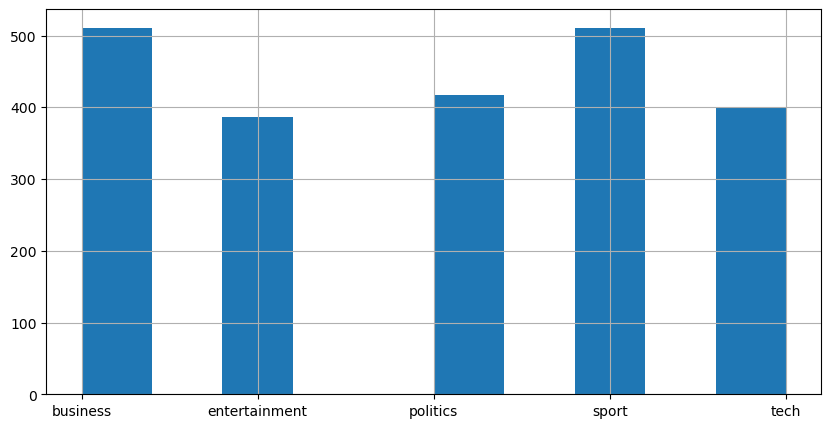

In [33]:
# %pip install matplotlib
import matplotlib
labels.hist(figsize=(10, 5));

In [34]:
# Tokenize - CountVectorizer + Train model

from sklearn.model_selection import train_test_split
inputs_train, inputs_test, labels_train, labels_test = train_test_split(inputs, labels, test_size=0.2, random_state=42, stratify=labels)
print(inputs_train.shape, inputs_test.shape, labels_train.shape, labels_test.shape)

(1780,) (445,) (1780,) (445,)


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer(lowercase=True)
X_train = countVectorizer.fit_transform(inputs_train)
X_test = countVectorizer.transform(inputs_test)
print(X_train.shape, X_test.shape)

(1780, 26828) (445, 26828)


In [36]:
# what percentage of values are non-zero in X_train?

(X_train != 0).sum() / np.prod(X_train.shape)

0.007488926544964761

In [37]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, labels_train)
print("Train score: ", model.score(X_train, labels_train))
print("Test score: ", model.score(X_test, labels_test))

Train score:  0.9938202247191011
Test score:  0.9797752808988764


In [38]:
# Tokenize + CountVectorizer + stop words removed + Train model

vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)
print(X_train.shape, X_test.shape)

(1780, 26537) (445, 26537)


In [39]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, labels_train)
print("Train score: ", model.score(X_train, labels_train))
print("Test score: ", model.score(X_test, labels_test))

Train score:  0.994943820224719
Test score:  0.9842696629213483


In [40]:
# Tokenize + CountVectorizer + lemmatization + Train model

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [41]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    words_and_tags = nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
            for word, tag in words_and_tags]

In [42]:
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(X_train, labels_train)
print("Train score: ", model.score(X_train, labels_train))
print("Test score: ", model.score(X_test, labels_test))

c:\Users\debnathk\AppData\Local\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Train score:  0.9938202247191011
Test score:  0.9775280898876404


In [43]:
# Tokenize + CountVectorizer + stemming + Train model

class StemTokenizer:
    def __init__ (self):
        self.ps = PorterStemmer()
    def __call__ (self, doc):
        tokens = word_tokenize(doc)
        return [self.ps.stem(token) for token in tokens]

In [44]:
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(X_train, labels_train)
print("Train score: ", model.score(X_train, labels_train))
print("Test score: ", model.score(X_test, labels_test))

c:\Users\debnathk\AppData\Local\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Train score:  0.9910112359550561
Test score:  0.9752808988764045


In [45]:
# Tokenize + CountVectorizer + simple splitting + Train model

def simpleTokenizer(words):
    return words.split()

In [46]:
vectorizer = CountVectorizer(tokenizer=simpleTokenizer)
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(X_train, labels_train)
print("Train score: ", model.score(X_train, labels_train))
print("Test score: ", model.score(X_test, labels_test))

c:\Users\debnathk\AppData\Local\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Train score:  0.996629213483146
Test score:  0.9820224719101124


### Case Study: Movie Recommender System

In [47]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [48]:
# Read movies dataset

df = pd.read_csv('../data/tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [49]:
# Analyze row structure of the dataset, displaying the first row

x = df.iloc[0]
x

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [50]:
x['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [51]:
x['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [52]:
# For usability, convert the json documents of 'genre' to a list of python dictionaries
j = json.loads(x['genres'])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [53]:
' '.join(''.join(jj['name'].split()) for jj in j)

'Action Adventure Fantasy ScienceFiction'

In [54]:
# Create a method to convert the relevant data for each movie into a single string
# to be fed into TfIdfVectorizer
def to_string(row):
    genres = json.loads(row['genres'])
    genres = ' '.join(''.join(j['name'].split()) for j in genres)

    keywords = json.loads(row['keywords'])
    keywords = ' '.join(''.join(k['name'].split()) for k in keywords)

    return f"{genres} {keywords}"

In [55]:
# Create a new string representation of each movie
df['string'] = df.apply(to_string, axis=1)
df['string']

0       Action Adventure Fantasy ScienceFiction cultur...
1       Adventure Fantasy Action ocean drugabuse exoti...
2       Action Adventure Crime spy basedonnovel secret...
3       Action Crime Drama Thriller dccomics crimefigh...
4       Action Adventure ScienceFiction basedonnovel m...
                              ...                        
4798    Action Crime Thriller unitedstates–mexicobarri...
4799                                      Comedy Romance 
4800    Comedy Drama Romance TVMovie date loveatfirsts...
4801                                                     
4802      Documentary obsession camcorder crush dreamgirl
Name: string, Length: 4803, dtype: object

In [56]:
# Create a TfIdfVectorizer object
tfidf = TfidfVectorizer(max_features=2000) # max-features limits the number of columns in the final matrix

In [57]:
# Creata a datamatrix from the overviews
X = tfidf.fit_transform(df['string'])

In [58]:
X

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37285 stored elements in Compressed Sparse Row format>

In [59]:
# Generate a mapping from movie title -> index (in df)
movie2idx = pd.Series(df.index, index=df['title'])
movie2idx

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [60]:
idx = movie2idx['John Carter']
idx

4

In [61]:
query = X[idx]
query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [62]:
# Print the query vector
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [63]:
# Compute similarity bewtween query and every vector in X
scores = cosine_similarity(query, X)
scores = scores.flatten()
scores

array([0.19230894, 0.02416566, 0.1089219 , ..., 0.        , 0.        ,
       0.        ])

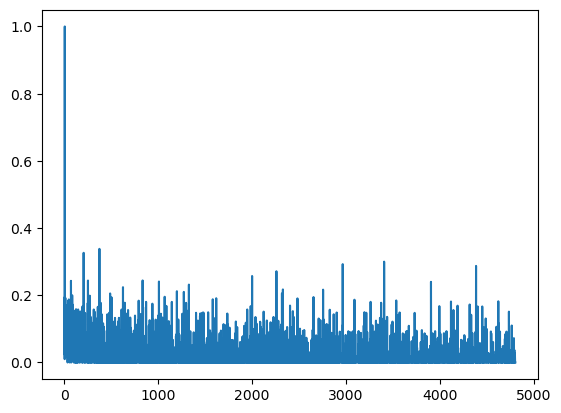

In [64]:
# Plot the scores
plt.plot(scores);

In [65]:
# Sort the scores in descending order
(-scores).argsort() # Not sorting the scores, but the movies themselves

array([   4,  373,  205, ..., 2378, 2364, 4802], dtype=int64)

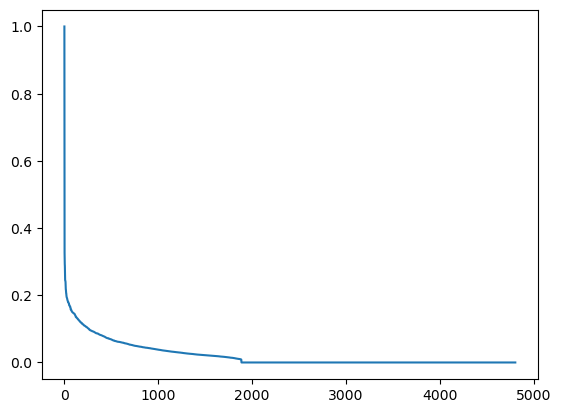

In [66]:
# Plot the sorted movies
plt.plot(scores[(-scores).argsort()]);

In [67]:
# Get top 5 matches (excluding the query itself, obviously!)
recommended_idx = (-scores).argsort()[1:6]
recommended_idx

array([ 373,  205, 3405, 2964, 4384], dtype=int64)

In [68]:
# Convert indices back to titles
df['title'].iloc[recommended_idx]

373                        Mission to Mars
205     Sherlock Holmes: A Game of Shadows
3405            Stargate: The Ark of Truth
2964                 The Last Days on Mars
4384                           Guiana 1838
Name: title, dtype: object

In [69]:
# Create a function to perform all the above tasks at once
def recommend(title):
    # Get the row in the dataframe for the query movie
    idx = movie2idx[title]
    # If the returned idx is a series of titles, select only one, let's say the first index (all indices return same title)
    if type(idx) == pd.Series:
        idx = idx.iloc[0]

    # Calculate the pairwise similarities for this movie
    query = X[idx]
    scores = cosine_similarity(query, X)
    scores = scores.flatten()

    # Sort the scores in descending order
    (-scores).argsort() # Not sorting the scores, but the movies themselves

    # Get top 5 matches (excluding the query itself, obviously!)
    recommended_idx = (-scores).argsort()[1:6]
    recommended_idx

    # Convert indices back to titles
    return df['title'].iloc[recommended_idx]

In [70]:
# Return recommendations
title = 'Scream 3'
print(f'Recommendations for movies similar to "{title}":')
recommend(title)

Recommendations for movies similar to "Scream 3":


3902    Friday the 13th Part VI: Jason Lives
4628                          Graduation Day
4053        Friday the 13th: A New Beginning
4048                             The Calling
1084                         The Glimmer Man
Name: title, dtype: object

In [71]:
# Return recommendations
title = 'Avatar'
print(f'Recommendations for movies similar to "{title}":')
recommend(title)

Recommendations for movies similar to "Avatar":


47      Star Trek Into Darkness
3214                 Barbarella
1287         A Monster in Paris
61            Jupiter Ascending
3730                      Cargo
Name: title, dtype: object

In [72]:
# Return recommendations
title = 'John Carter'
print(f'Recommendations for movies similar to "{title}":')
recommend(title)

Recommendations for movies similar to "John Carter":


373                        Mission to Mars
205     Sherlock Holmes: A Game of Shadows
3405            Stargate: The Ark of Truth
2964                 The Last Days on Mars
4384                           Guiana 1838
Name: title, dtype: object

### Neural Word Embeddings



In [73]:
# Slower but always guaranteed to work
# %pip install wget
# import wget
# url = 'https://archive.org/download/google-news-vectors-negative-300.bin_202311/GoogleNews-vectors-negative300.bin.gz'
# path = '../data'
# filename = 'GoogleNews-vectors-negative300.bin.gz'
# wget.download(url, out=f'{path}/{filename}')

# You are better off just downloading this from the source
# https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing
# https://code.google.com/archive/p/word2vec/

In [ ]:
# unzip downloaded file
# import gzip
# import shutil

# with gzip.open('../data/GoogleNews-vectors-negative300.bin.gz', 'rb') as f_in:
#     with open('../data/GoogleNews-vectors-negative300.bin', 'wb') as f_out:
#         shutil.copyfileobj(f_in, f_out)

In [1]:
# Load libraries

from gensim.models import KeyedVectors

In [2]:
# Load pre-trained embeddings 

word_vectors = KeyedVectors.load_word2vec_format(
    '../data/GoogleNews-vectors-negative300.bin',
    binary=True
)

In [3]:
def find_analogies(w1, w2, w3):
    # w1 - w2 = ? - w3
    # e.g king - man = ? - woman
    #              ? = king - man + woman
    r = word_vectors.most_similar(positive=[w1, w3], negative=[w2])
    print(f'{w1} - {w2} = {r[0][0]} - {w3}') 

In [4]:
find_analogies('king', 'man', 'woman')

king - man = queen - woman


In [5]:
find_analogies('India', 'Delhi', 'Paris')

India - Delhi = France - Paris


In [8]:
def nearest_neighbors(w):
    r = word_vectors.most_similar(positive=[w])
    print(f'Neighbors of {w}:')
    for word, score in r:
        print(f'{word} ')

In [9]:
nearest_neighbors('India')

Neighbors of India:
Indias 
Indiaâ_€_™ 
Pakistan 
Delhi 
Bangalore 
subcontinent 
Bangladesh 
sub_continent 
Mumbai 
Sri_Lanka 


In [10]:
nearest_neighbors('Kolkata')

Neighbors of Kolkata:
Calcutta 
Chennai 
Delhi 
Bangalore 
Ahmedabad 
Guwahati 
Jaipur 
Siliguri 
Bhubaneswar 
Hyderabad 


In [ ]:
# Exercise: Use GloVe vectors for the above two functions